In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **1. Un proyecto involucra tres tareas. La tarea 1 puede tomar tres dias (70% probabilidad), pero tambien podría tomar dos dias (10% probabilidad) o cuatro dias (20% probabilidad). La tarea 2 puede tomar seis dias (60% probabilidad), y 20% de probabilidad de tomar sea cinco u ocho dias. La tarea 3 tiene 80% de probabilidad de completarse en cuatro dias, 5% de probabilidad de completarse en tres dias, y 15% probabilidad de completarse cinco dias. Si las tareas se deben ejecutar en secuencia, entregar información respecto al tiempo de finalización del proyecto. Si las tareas 2 y 3 deben ejecutarse en paralelo, entregar información respecto al tiempo de finalización del proyecto. Si se conoce que existen interrupciones en el sistema de soporte, creando tiempos de retraso que siguen una distribucion de Poisson con parametro 2, entregar información respecto al tiempo de finalización del proyecto.**

### **2. Predecir los precios de stocks Apple Inc. (AAPL) para los dos últimos meses del 2023. Utilizar los precios entre enero 2010 a octubre 2023 como data de entrenamiento**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [4]:
#Defininir variables data set
stock_name = 'AAPL'
#Entrenamiento start y end
#Prueba end y predict
start_date = '2010-01-01'
end_date = '2023-10-31'
predict_end_date = '2023-12-31'

In [5]:
# cargar datos desde Yahoo Finance
prices_df = yf.download(tickers=stock_name, start=start_date, end=predict_end_date)


[*********************100%%**********************]  1 of 1 completed


In [6]:
prices_df 


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


In [7]:
#preparar datos de entrenamiento y prueba
prices =  prices_df['Adj Close']
train_set = prices.loc[:end_date]
test_set = prices.loc[end_date:predict_end_date]

In [8]:
train_set

Date
2010-01-04      6.478999
2010-01-05      6.490201
2010-01-06      6.386965
2010-01-07      6.375157
2010-01-08      6.417541
                 ...    
2023-10-25    170.874893
2023-10-26    166.670425
2023-10-27    167.998672
2023-10-30    170.065933
2023-10-31    170.545319
Name: Adj Close, Length: 3481, dtype: float64

In [9]:
test_set

Date
2023-10-31    170.545319
2023-11-01    173.741104
2023-11-02    177.336380
2023-11-03    176.417572
2023-11-06    178.994186
2023-11-07    181.580780
2023-11-08    182.649368
2023-11-09    182.169998
2023-11-10    186.399994
2023-11-13    184.800003
2023-11-14    187.440002
2023-11-15    188.009995
2023-11-16    189.710007
2023-11-17    189.690002
2023-11-20    191.449997
2023-11-21    190.639999
2023-11-22    191.309998
2023-11-24    189.970001
2023-11-27    189.789993
2023-11-28    190.399994
2023-11-29    189.369995
2023-11-30    189.949997
2023-12-01    191.240005
2023-12-04    189.429993
2023-12-05    193.419998
2023-12-06    192.320007
2023-12-07    194.270004
2023-12-08    195.710007
2023-12-11    193.179993
2023-12-12    194.710007
2023-12-13    197.960007
2023-12-14    198.110001
2023-12-15    197.570007
2023-12-18    195.889999
2023-12-19    196.940002
2023-12-20    194.830002
2023-12-21    194.679993
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.14

In [10]:
#calcular la variadcion diaria de precios
daily_data = ((train_set - train_set.shift(1))/ train_set.shift(1))[1:]
daily_data

Date
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
2010-01-11   -0.008821
                ...   
2023-10-25   -0.013492
2023-10-26   -0.024606
2023-10-27    0.007969
2023-10-30    0.012305
2023-10-31    0.002819
Name: Adj Close, Length: 3480, dtype: float64

In [11]:
train_set.shift(1)

Date
2010-01-04           NaN
2010-01-05      6.478999
2010-01-06      6.490201
2010-01-07      6.386965
2010-01-08      6.375157
                 ...    
2023-10-25    173.211807
2023-10-26    170.874893
2023-10-27    166.670425
2023-10-30    167.998672
2023-10-31    170.065933
Name: Adj Close, Length: 3481, dtype: float64

In [12]:
# calcular mu y sigma para los cambios de x
mu = daily_data.mean()
sigma = daily_data.std()
mu, sigma

(0.001099414507706992, 0.017838584678676207)

In [13]:

# defininir los parametros para nuestra simulacion
time_delta = 1 #dia
time_period = len(test_set)
time_period

42

In [14]:
time_points =  int(time_period/time_delta)
time_points

42

In [15]:
# crear un arreglo que contenga cada tiempo de simulacion
time = np.arange(1, time_points+1)
time


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [16]:
#crear arreglo donde guardadremos nuestras predicciones
price_prediction = np.zeros(time_points)
price_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
#definir precio inicial
price_initial = train_set[-1]
price_prediction[0] = price_initial 
price_prediction

array([170.5453186,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ])

In [18]:
# generar numeros aleatorios
epsilon = np.random.normal(0,1, time_points)
epsilon

array([ 0.27713935, -0.49247343, -0.14284751,  0.99631877,  1.8468839 ,
        0.60570931, -0.63918961, -0.60984574,  1.06334526,  0.04894112,
       -0.03728272, -0.56626798, -1.55647965,  0.22909888, -0.51522475,
       -1.73107   , -1.01204475, -1.56465896, -0.77441489, -0.61575784,
        0.4849625 ,  0.591581  , -0.89597412, -1.37938568,  0.61275261,
        0.44858788, -0.71661788, -1.15873338, -0.50719935, -0.29105187,
       -1.05785995, -1.56272974,  0.12982434, -0.65647524,  0.419036  ,
       -0.3944165 , -0.33691027,  0.65404731, -0.9226424 , -0.49351477,
        1.75395594, -0.06000801])

In [19]:
# aplicar la ecuacion para las predicciones
for i in range(time_points-1):
    price_prediction[i + 1] = price_prediction[i] * np.exp((mu - 0.5 * sigma**2) * time_delta + sigma * np.sqrt(time_delta) * epsilon[i])

In [20]:
price_prediction

array([170.5453186 , 171.55177918, 170.211268  , 169.93780683,
       173.1478323 , 179.11567987, 181.23185116, 179.34569963,
       177.57210438, 181.14279262, 181.4715654 , 181.52151977,
       179.86617472, 175.10538866, 175.98787847, 174.54185103,
       169.39360236, 166.51940946, 162.08824052, 160.01486591,
       158.41573022, 159.94246117, 161.79132823, 159.3757791 ,
       155.64827636, 157.50697912, 158.92179869, 157.05076661,
       153.98254482, 152.73919194, 152.09117744, 149.38842232,
       145.41812237, 145.89240308, 144.32953212, 145.54923565,
       144.66473512, 143.93318491, 145.75932221, 143.51484164,
       142.39076693, 147.05454264])

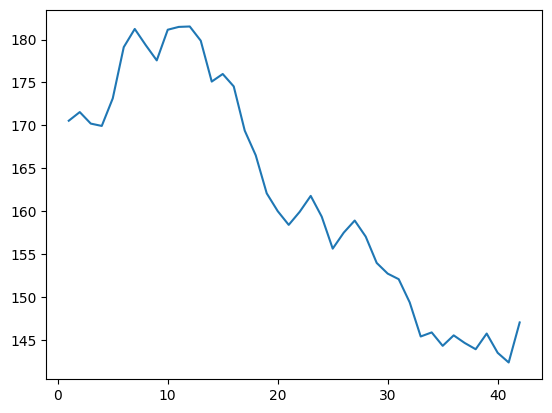

In [21]:
plt.plot(time, price_prediction)

In [22]:
#generar multiples simulaciones
n_simulations = 100
predictions = []
for i in range(n_simulations):
    epsilon = np.random.normal(0,1, time_points)
    price_prediction = np.zeros(time_points)
    price_prediction[0] = price_initial
    for j in range(time_points-1):
        price_prediction[j + 1] = price_prediction[j] * np.exp((mu - 0.5 * sigma**2) * time_delta + sigma * np.sqrt(time_delta) * epsilon[j])
    predictions.append(price_prediction)


In [23]:
predictions

[array([170.5453186 , 174.61747927, 176.67429489, 174.88945311,
        170.62074873, 170.28016339, 168.66502247, 171.31077901,
        172.71425626, 178.82112604, 183.36748913, 185.9031994 ,
        184.98312501, 181.98450268, 181.28561418, 186.23364151,
        182.33728581, 187.00401453, 186.72609408, 184.33186643,
        188.6737474 , 190.63631046, 194.63257141, 196.09728916,
        195.82763785, 202.23045456, 207.0320878 , 202.6606847 ,
        205.08972532, 206.62392111, 207.39518108, 213.45015268,
        214.47329171, 213.00451188, 212.10687456, 212.53769674,
        215.91486484, 215.10691753, 216.17921004, 218.25247224,
        220.32325991, 226.27520014]),
 array([170.5453186 , 169.27998343, 172.33067124, 175.73934002,
        174.83691368, 173.58824972, 179.69391035, 173.20527896,
        165.59794903, 165.45570313, 172.82469505, 174.34022663,
        171.09578984, 170.34579499, 167.12379144, 166.13790784,
        165.89439625, 165.58736215, 168.77613483, 169.60364695,
  

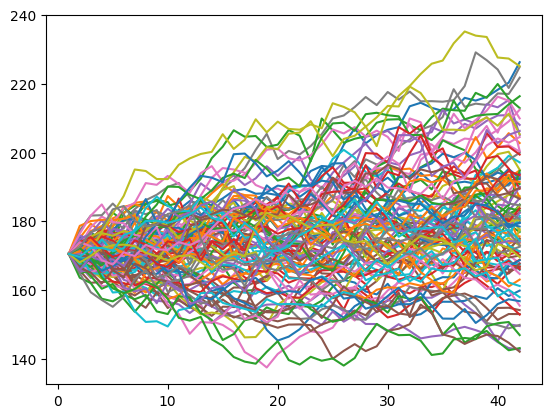

In [24]:
for predictions in predictions:
    plt.plot(time, predictions)
plt.show()

In [25]:
predictions_max =  [np.max(daily_predictions).max() for daily_predictions in zip(predictions)]
predictions_min =  [np.min(daily_predictions).min() for daily_predictions in zip(predictions)]
predictions_average =  0.5 * np.array(predictions_max) + 0.5 * np.array(predictions_min)
predictions_average

array([170.5453186 , 169.67409811, 172.29398586, 172.25103279,
       171.54661313, 175.98532618, 177.22643414, 180.10995567,
       180.18894021, 179.58335246, 180.43457978, 182.03790541,
       184.04219355, 181.03337843, 180.14426379, 175.60015616,
       179.5251098 , 177.09880249, 171.47365972, 171.41127978,
       172.74055808, 175.93074563, 177.65468404, 180.67127186,
       179.6721667 , 182.89010142, 186.37185206, 181.50493439,
       185.72323036, 181.46117814, 175.52427563, 177.46359126,
       177.88555567, 178.14843854, 178.33967418, 173.88075865,
       174.72998083, 168.48376035, 168.96127102, 169.46044747,
       162.23590968, 161.2071916 ])

In [26]:
final_dt = pd.DataFrame(test_set).reset_index().rename(columns={'Adj Close':'real'})
final_dt ['pred'] = predictions_average
final_dt

,Date,real,pred
0,2023-10-31,170.545319,170.545319
1,2023-11-01,173.741104,169.674098
2,2023-11-02,177.336380,172.293986
3,2023-11-03,176.417572,172.251033
4,2023-11-06,178.994186,171.546613
5,2023-11-07,181.580780,175.985326
6,2023-11-08,182.649368,177.226434
7,2023-11-09,182.169998,180.109956
8,2023-11-10,186.399994,180.188940
9,2023-11-13,184.800003,179.583352


In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mape = mean_absolute_percentage_error(final_dt['real'], final_dt['pred'])
mape

6.884472670594451

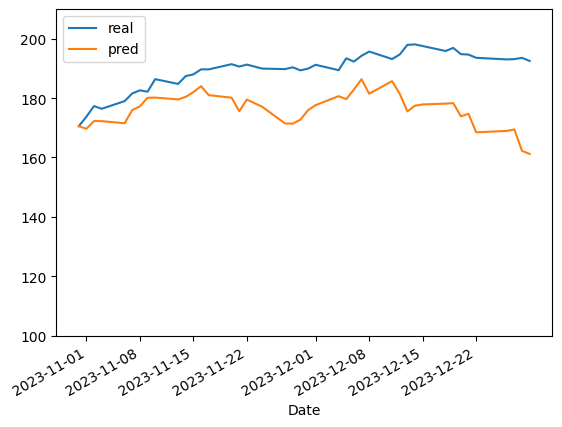

In [29]:
final_dt.plot(x='Date')
plt.ylim([100,210])
plt.show()